# Binary Classifier Performance Evaluation Tools

**Motivation**: simulate truth and prediction from random to show simple example for confusion matrix. 

In [2]:
from sklearn import metrics
from pandas_ml import ConfusionMatrix

import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
sns.set()

#### Simulate a single data set with confusion matrix

In [3]:
# simulate from random
y_true = np.random.choice([0,1], (3000,), p=[1/2,1/2])
y_pred = np.random.choice([0,1], (3000,), p=[1/2,1/2])

In [4]:
# calculation from sklearn metrics
metrics.f1_score(y_true, y_pred)  

0.5194206714944042

In [5]:
# confusion matrix from pandas ml
cm = ConfusionMatrix(y_true, y_pred)
cm.print_stats()

population: 3000
P: 1516
N: 1484
PositiveTest: 1522
NegativeTest: 1478
TP: 789
TN: 751
FP: 733
FN: 727
TPR: 0.5204485488126649
TNR: 0.5060646900269542
PPV: 0.5183968462549278
NPV: 0.5081190798376184
FPR: 0.4939353099730458
FDR: 0.4816031537450723
FNR: 0.4795514511873351
ACC: 0.5133333333333333
F1_score: 0.5194206714944042
MCC: 0.026514582432038473
informedness: 0.026513238839619202
markedness: 0.02651592609254605
prevalence: 0.5053333333333333
LRP: 1.0536775531214115
LRN: 0.947608992758995
DOR: 1.1119328342944428
FOR: 0.4918809201623816


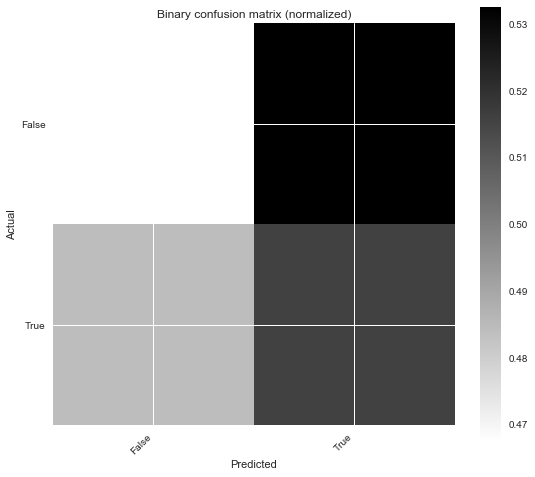

In [4]:
# Plotting
cm.plot(normalized=True)
plt.show()

#### Simulating many confusion matrices, grabbing 5 measures, and plotting radar chart

In [13]:
# simulating confusion matrices
model_cm = np.empty((5,), object)
for i in range(5):
    temp_p = np.random.uniform()
    y_true = np.random.choice([0,1], (3000,), p=[temp_p,1-temp_p])
    y_pred = np.random.choice([0,1], (3000,), p=[temp_p,1-temp_p])
    model_cm[i] = ConfusionMatrix(y_true, y_pred)

In [17]:
tbl = [(cm.prevalence, cm.MCC, cm.F1_score, cm.ACC, cm.markedness) for cm in model_cm]
df = pd.DataFrame(data=tbl, columns=['prev', 'mcc', 'f1_score', 'acc', 'markedness'])

In [19]:
labels = ['prev', 'mcc', 'f1_score', 'acc', 'markedness']

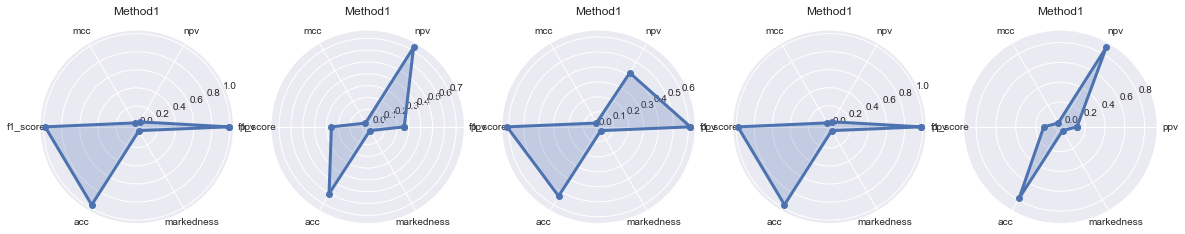

In [14]:
fig = plt.figure(figsize=(20,5))
for index in range(len(model_cm)):
    stats = df.loc[index]
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
    # close the plot
    stats=np.concatenate((stats,[stats[0]]))
    angles=np.concatenate((angles,[angles[0]]))
    
    ax = fig.add_subplot(151+index, polar=True)
    ax.plot(angles, stats, 'o-', linewidth=3)
    ax.fill(angles, stats, alpha=0.25)
    ax.set_thetagrids(angles * 180/np.pi, labels)
    ax.set_title('Method1')
    ax.grid(True)

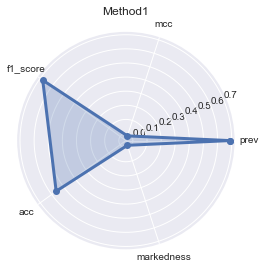

In [44]:
for 


### Chicken Scratch

In [41]:
train, test, validate = np.split(y_true, [150,225])

In [51]:
while ((test.mean() + 0.01 >= train.mean()) and (test.mean() - 0.01 <= train.mean())) == False:
    y_true = np.random.choice([0,1], (300,), p=[29/30,1/30])
    train, test, validate = np.split(y_true, [150,225])
print(test.mean(),train.mean())

0.02666666666666667 0.02666666666666667


In [54]:
logit_model = LogisticRegression()

In [ ]:
logit_model()